In [1]:
pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from pprint import pprint

# Import API key
from config import weatherPy_apiKey

# Incorporated citipy to determine city based on latitude and longitude

from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create an empty list to store JSON responses
response_json = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

In [5]:
# Build query URL
queryUrl = "http://api.openweathermap.org/data/2.5/weather?" + "appid=" + weatherPy_apiKey + "&q="

In [6]:
# creating dataframe wtih test_cities
test_cities = ['acapulco', 'jamestown', 'dali', 'malatya', 'manila', 'pevek', 'cidreira']
responses = []
city_name = []
country_name = []
latitude = []
longitude = []
temperature = []
humidity = []
clouds = []
wind = []

index = 1
for city in cities:
    weather_data = requests.get(queryUrl + city).json()
    responses.append(weather_data)
    try:
        city_name.append(weather_data['name'])
        country_name.append(weather_data['sys']['country'])
        latitude.append(weather_data['coord']['lat'])
        longitude.append(weather_data['coord']['lon'])
        temperature.append(weather_data['main']['temp'])
        humidity.append(weather_data['main']['humidity'])
        clouds.append(weather_data['clouds']['all'])
        wind.append(weather_data['wind']['speed'])
        print(f'Record {index} | {city} found')
        index += 1
    except:
        print(f'Record {index} | **{city} not found**')
        index += 1
        pass

Record 1 | vaini found
Record 2 | tasiilaq found
Record 3 | itarema found
Record 4 | hobart found
Record 5 | rikitea found
Record 6 | el alto found
Record 7 | victoria found
Record 8 | atuona found
Record 9 | khatanga found
Record 10 | **mys shmidta not found**
Record 11 | mataura found
Record 12 | chokurdakh found
Record 13 | **taolanaro not found**
Record 14 | bethel found
Record 15 | bukama found
Record 16 | cabo san lucas found
Record 17 | deputatskiy found
Record 18 | puerto ayora found
Record 19 | busselton found
Record 20 | hilo found
Record 21 | punta arenas found
Record 22 | bubaque found
Record 23 | new norfolk found
Record 24 | ushuaia found
Record 25 | beisfjord found
Record 26 | vanimo found
Record 27 | barrow found
Record 28 | oistins found
Record 29 | bredasdorp found
Record 30 | qaanaaq found
Record 31 | zyryanka found
Record 32 | tuatapere found
Record 33 | lac du bonnet found
Record 34 | auki found
Record 35 | souillac found
Record 36 | hithadhoo found
Record 37 | los

Record 281 | komsomolskiy found
Record 282 | **vaitupu not found**
Record 283 | hinckley found
Record 284 | karangasem found
Record 285 | huarmey found
Record 286 | houston found
Record 287 | toktogul found
Record 288 | artigas found
Record 289 | **karauzyak not found**
Record 290 | urucara found
Record 291 | russell found
Record 292 | camacha found
Record 293 | maarianhamina found
Record 294 | troyes found
Record 295 | montepuez found
Record 296 | maniitsoq found
Record 297 | port-gentil found
Record 298 | marechal deodoro found
Record 299 | **cam pha not found**
Record 300 | glazov found
Record 301 | kuusamo found
Record 302 | gat found
Record 303 | shuangyang found
Record 304 | visby found
Record 305 | yar-sale found
Record 306 | mindelo found
Record 307 | reo found
Record 308 | **kawana waters not found**
Record 309 | **geresk not found**
Record 310 | ostrovnoy found
Record 311 | **saleaula not found**
Record 312 | kassala found
Record 313 | madang found
Record 314 | bathsheba foun

Record 566 | tombouctou found
Record 567 | thanh hoa found
Record 568 | kondinskoye found
Record 569 | ngara found
Record 570 | kayerkan found
Record 571 | guanica found
Record 572 | nuuk found
Record 573 | samaro found
Record 574 | monterey found
Record 575 | havre found
Record 576 | fairbanks found
Record 577 | banjar found
Record 578 | port hedland found
Record 579 | povenets found
Record 580 | ati found
Record 581 | svetlogorsk found
Record 582 | puerto madero found
Record 583 | leh found
Record 584 | praia da vitoria found
Record 585 | bugene found
Record 586 | booue found
Record 587 | mwense found
Record 588 | hambantota found
Record 589 | vilhena found
Record 590 | chancay found
Record 591 | naze found
Record 592 | marsh harbour found
Record 593 | china found
Record 594 | temirtau found
Record 595 | zhuhai found
Record 596 | bratsk found
Record 597 | san andres found
Record 598 | troitskoye found
Record 599 | vao found
Record 600 | pafos found
Record 601 | morlaix found
Record 6

In [25]:
# print first JSON response for API query reference
pprint(responses[0])

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -21.2, 'lon': -175.2},
 'dt': 1617907411,
 'id': 4032243,
 'main': {'feels_like': 294.76,
          'humidity': 94,
          'pressure': 1012,
          'temp': 294.15,
          'temp_max': 294.15,
          'temp_min': 294.15},
 'name': 'Vaini',
 'sys': {'country': 'TO',
         'id': 7285,
         'sunrise': 1617990638,
         'sunset': 1618032802,
         'type': 1},
 'timezone': 46800,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 230, 'speed': 1.54}}


In [8]:
weather_df = pd.DataFrame({
    'City': city_name,
    'Country': country_name,
    'Lat': latitude,
    'Lng': longitude,
    'Temperature': temperature,
    'Humidity': humidity,
    'Cloudiness': clouds,
    'Wind (MPH)': wind
})

weather_df

,City,Country,Lat,Lng,Temperature,Humidity,Cloudiness,Wind (MPH)
0,Vaini,TO,-21.2000,-175.2000,294.15,94,20,1.54
1,Tasiilaq,GL,65.6145,-37.6368,267.15,68,20,2.06
2,Itarema,BR,-2.9248,-39.9167,301.64,74,91,7.61
3,Hobart,AU,-42.8794,147.3294,283.58,71,8,4.12
4,Rikitea,PF,-23.1203,-134.9692,297.70,65,27,1.05
...,...,...,...,...,...,...,...,...
549,Asău,RO,46.4333,26.4000,277.10,48,40,0.51
550,Taksimo,RU,56.3444,114.8794,270.74,90,100,1.36
551,Gambo,CF,4.6482,22.2633,294.29,96,96,0.43
552,Sola,VU,-13.8833,167.5500,301.42,71,100,4.34


In [9]:
# function to convert 'Temperature' column from Kelvin to Farenheit
def Kelvin_to_Farenheit(kelvin):
    farenheit = (kelvin-273.15)*(9/5)+32
    return farenheit

In [10]:
weather_df['Temperature'] = Kelvin_to_Farenheit(weather_df['Temperature'])
weather_df

,City,Country,Lat,Lng,Temperature,Humidity,Cloudiness,Wind (MPH)
0,Vaini,TO,-21.2000,-175.2000,69.800,94,20,1.54
1,Tasiilaq,GL,65.6145,-37.6368,21.200,68,20,2.06
2,Itarema,BR,-2.9248,-39.9167,83.282,74,91,7.61
3,Hobart,AU,-42.8794,147.3294,50.774,71,8,4.12
4,Rikitea,PF,-23.1203,-134.9692,76.190,65,27,1.05
...,...,...,...,...,...,...,...,...
549,Asău,RO,46.4333,26.4000,39.110,48,40,0.51
550,Taksimo,RU,56.3444,114.8794,27.662,90,100,1.36
551,Gambo,CF,4.6482,22.2633,70.052,96,96,0.43
552,Sola,VU,-13.8833,167.5500,82.886,71,100,4.34


In [11]:
weather_df.dtypes

City            object
Country         object
Lat            float64
Lng            float64
Temperature    float64
Humidity         int64
Cloudiness       int64
Wind (MPH)     float64
dtype: object

### Analysis of 'Temperature (Farenheit) v. Latitude'

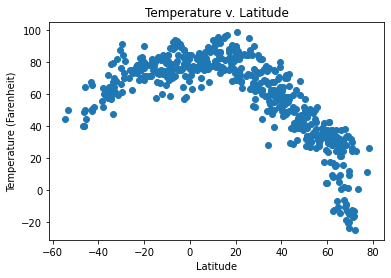

In [12]:
# Scatter Plot - Temperature (Farenheit) v. Latitude
x_values = weather_df['Lat']
y_values = weather_df['Temperature']
plt.scatter(x_values, y_values)
plt.title('Temperature v. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature (Farenheit)')
plt.savefig(f'visualizations/TempLat.png')
plt.show()

From the weather data [weather_df], the code above is plotting <b>cities' temperatures in relation to their latitude</b> - <em>latitude meaning their north-south position on the Earth's surface</em>.  

### Analysis of 'Humidity (%) v. Latitude'


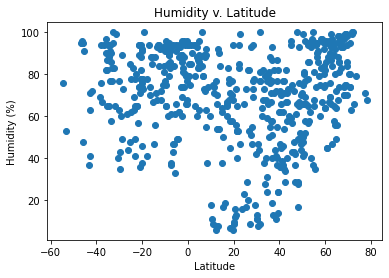

In [13]:
# Scatter Plot - Humidity (%) v. Latitude
x_values = weather_df['Lat']
y_values = weather_df['Humidity']
plt.scatter(x_values, y_values)
plt.title('Humidity v. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig(f'visualizations/HumLat.png')
plt.show()

Using the same data, this code is plotting <b>cities' humidity in relation to their latitude</b>.

### Analysis of 'Cloudiness(%) v. Latitude'


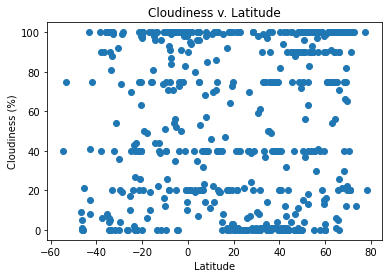

In [14]:
# Scatter Plot - Cloudiness (%) v. Latitude
x_values = weather_df['Lat']
y_values = weather_df['Cloudiness']
plt.scatter(x_values, y_values)
plt.title('Cloudiness v. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig(f'visualizations/CloudLat.png')
plt.show()

This code is plotting the <b>cities' cloudiness in relation to their latitude</b>.

### Analysis of  'Wind Speed (mph) v. Latitude'


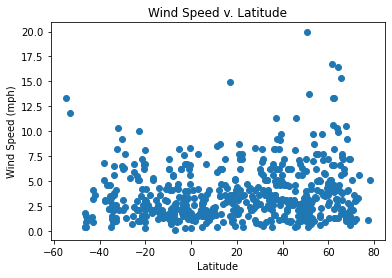

In [15]:
# Scatter Plot - Wind Speed (mph)) v. Latitude
x_values = weather_df['Lat']
y_values = weather_df['Wind (MPH)']
plt.scatter(x_values, y_values)
plt.title('Wind Speed v. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig(f'visualizations/WindLat.png')
plt.show()

And finally, the <b>cities' wind speed in relation to their latitude</b>.

## Linear Regressions: Northern Hemisphere v. Southern Hemisphere

In [16]:
# Northern Hemisphere Data Frame
northWeather_df = weather_df.loc[(
    weather_df['Lat'] >= 0)]
northWeather_df

,City,Country,Lat,Lng,Temperature,Humidity,Cloudiness,Wind (MPH)
1,Tasiilaq,GL,65.6145,-37.6368,21.200,68,20,2.06
6,Hong Kong,HK,22.2855,114.1577,67.316,83,100,0.89
8,Khatanga,RU,71.9667,102.5000,-24.700,100,100,1.18
10,Chokurdakh,RU,70.6333,147.9167,-12.064,95,100,2.13
11,Bethel,US,41.3712,-73.4140,70.286,37,1,3.09
...,...,...,...,...,...,...,...,...
548,Arrondissement de Morlaix,FR,48.5833,-4.0000,46.328,76,75,2.57
549,Asău,RO,46.4333,26.4000,39.110,48,40,0.51
550,Taksimo,RU,56.3444,114.8794,27.662,90,100,1.36
551,Gambo,CF,4.6482,22.2633,70.052,96,96,0.43


In [17]:
# Southern Hemisphere Data Frame
southWeather_df = weather_df.loc[(
    weather_df['Lat'] < 0)]
southWeather_df

,City,Country,Lat,Lng,Temperature,Humidity,Cloudiness,Wind (MPH)
0,Vaini,TO,-21.2000,-175.2000,69.800,94,20,1.54
2,Itarema,BR,-2.9248,-39.9167,83.282,74,91,7.61
3,Hobart,AU,-42.8794,147.3294,50.774,71,8,4.12
4,Rikitea,PF,-23.1203,-134.9692,76.190,65,27,1.05
5,El Alto,PE,-4.2714,-81.2147,91.400,49,0,6.17
...,...,...,...,...,...,...,...,...
534,Mwense,ZM,-10.3845,28.6980,65.534,93,16,1.65
536,Vilhena,BR,-12.7406,-60.1458,75.200,94,40,2.06
537,Chancay,PE,-11.5714,-77.2672,72.842,68,0,3.09
546,Vao,NC,-22.6667,167.4833,77.522,80,44,9.98


### Temperature (Farenheit) Linear Regressions

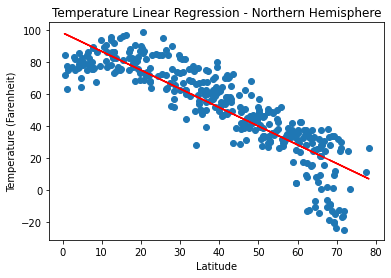

The r-value is: 0.7620928030619483


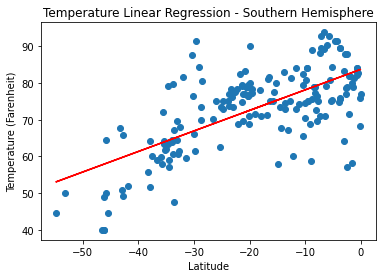

The r-value is: 0.45297735726549687


In [18]:
# Linear Regression - Temperature (Farenheit) v. Latitude (Northern Hemisphere)
x_values = northWeather_df['Lat']
y_values = northWeather_df['Temperature']
plt.scatter(x_values, y_values)
plt.title('Temperature Linear Regression - Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Temperature (Farenheit)')
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.savefig(f'visualizations/TempLinreg_North.png')
plt.show()
print(f"The r-value is: {rvalue**2}")

# Linear Regression - Temperature (Farenheit) v. Latitude (Southern Hemisphere)
x_values = southWeather_df['Lat']
y_values = southWeather_df['Temperature']
plt.scatter(x_values, y_values)
plt.title('Temperature Linear Regression - Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Temperature (Farenheit)')
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.savefig(f'visualizations/TempLinreg_South.png')
plt.show()
print(f"The r-value is: {rvalue**2}")

Above, the pair of linear regressions are modeling a potential linear relationship between cities' temperature and their latitude. 
<br>
<br>
The first linear regression model shows Northern Hemisphere cities with an <em>r-value of about 0.762</em>.Using the r-value and the given downward slope of the model's line, Northern Hemisphere cities show a strong, negative linear relationship between their temperature and their latitude.
<br>
<br>
<b>Or, as a city's latitude moves further north the colder its temperature may be</b>.
<br>
<br>
But the same does not show for cities in the Southern Hemisphere.
<br>
<br>
According to the second linear regression model, a more moderate relationship exists between a Southern Hemisphere city's temperature and its latitudinal position - interpreted with an <em>r-value of about 0.452</em>. So the <b>temperature of a Southern Hemisphere city may be less related to its latitude</b> according to the data.
<br>
<br>
<em>More about this at the end</em>.

### Humidity (%) Linear Regressions

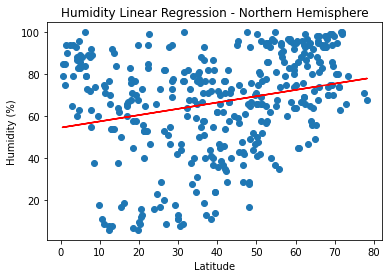

The r-value is: 0.06320770768954329


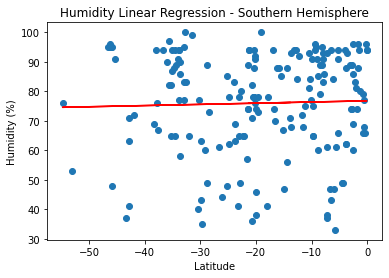

The r-value is: 0.0009849184227168426


In [19]:
# Linear Regression - Humidity (%) v. Latitude (Northern Hemisphere)
x_values = northWeather_df['Lat']
y_values = northWeather_df['Humidity']
plt.scatter(x_values, y_values)
plt.title('Humidity Linear Regression - Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.savefig(f'visualizations/HumLinreg_North.png')
plt.show()
print(f"The r-value is: {rvalue**2}")

# Linear Regression - Humidity (%) v. Latitude (Southern Hemisphere)
x_values = southWeather_df['Lat']
y_values = southWeather_df['Humidity']
plt.scatter(x_values, y_values)
plt.title('Humidity Linear Regression - Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.savefig(f'visualizations/HumLinreg_South.png')
plt.show()
print(f"The r-value is: {rvalue**2}")

The models above show a potential linear relationship between cities' humidity and their latitude. 
<br>
<br>
Both the Northern Hemisphere and the Southern Hemisphere linear regression models show <em>low r-values less than 0.1 (r-values of 0.06 and 0.0009 respectively)</em>.
<br>
<br>
<b>This may show that a city's humidity has almost no relationship to its latitude</b>.

### Cloudiness (%) Linear Regressions

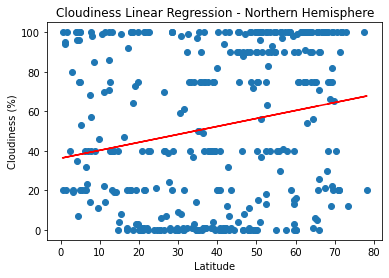

The r-value is: 0.04311715189361874


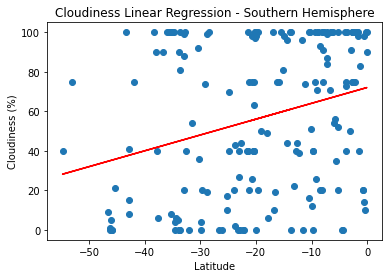

The r-value is: 0.07913976325221578


In [20]:
# Linear Regression - Cloudiness (%) v. Latitude (Northern Hemisphere)
x_values = northWeather_df['Lat']
y_values = northWeather_df['Cloudiness']
plt.scatter(x_values, y_values)
plt.title('Cloudiness Linear Regression - Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.savefig(f'visualizations/CloudLinreg_North.png')
plt.show()
print(f"The r-value is: {rvalue**2}")

# Linear Regression - Cloudiness (%) v. Latitude (Southern Hemisphere)
x_values = southWeather_df['Lat']
y_values = southWeather_df['Cloudiness']
plt.scatter(x_values, y_values)
plt.title('Cloudiness Linear Regression - Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.savefig(f'visualizations/CloudLinreg_South.png')
plt.show()
print(f"The r-value is: {rvalue**2}")

Similar to the "Humidity (%) Linear Regressions", the above linear regression models for cloudiness calculated <em> r-values less than 0.1 for both Northern Hemisphere and Southern Hemisphere</em>.
<br>
<br>
<b>Now what's shown, according to the data, is little to no linear relationship between cloudiness and a city's latitudinal location.</b>
<br>
<br>
It is interesting to note in the Northern Hemisphere model that the point distribution follows a rough pattern of parallel lines. Reasons unknown, this may merit further investigation.


### Wind Speed (mph) Linear Regressions

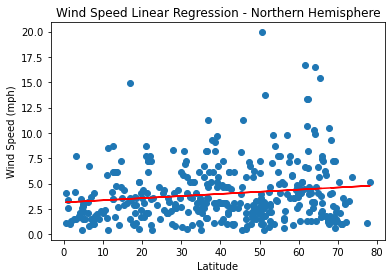

The r-value is: 0.021881990306120477


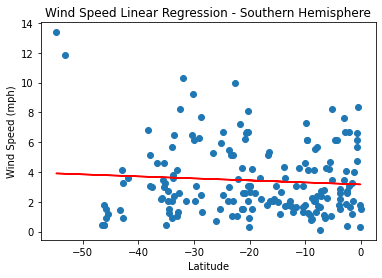

The r-value is: 0.005831764240071864


In [21]:
# Linear Regression - Wind Speed (mph) v. Latitude (Northern Hemisphere)
x_values = northWeather_df['Lat']
y_values = northWeather_df['Wind (MPH)']
plt.scatter(x_values, y_values)
plt.title('Wind Speed Linear Regression - Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.savefig(f'visualizations/WindLinreg_North.png')
plt.show()
print(f"The r-value is: {rvalue**2}")

# Linear Regression - Wind Speed (mph) v. Latitude (Southern Hemisphere)
x_values = southWeather_df['Lat']
y_values = southWeather_df['Wind (MPH)']
plt.scatter(x_values, y_values)
plt.title('Wind Speed Linear Regression - Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.savefig(f'visualizations/WindLinreg_South.png')
plt.show()
print(f"The r-value is: {rvalue**2}")

Lastly is the linear regression models for wind speed in relation to cities' latitudes.
<br>
<br>
The wind speed linear regression models calculated<em> r-values less than 0.1 for both Northern Hemisphere and Southern Hemisphere cities</em>.
<br>
<br>
Like the previous low r-value models, <b>there is almost no linear relationship between wind speed and the latitude of a city</b>. 

### More Conclusions

There is a potential limit with the sample size of the data set. There may not be enough cities representing both Northern and Southern Hemisphere cities. Because of a potential lack of representation in the data set, this could be the reason for the lower r-value calculated by the temperature linear regression model of Southern Hemisphere cities compared to Northern Hemisphere. 

## Save Data Frames as CSVs

In [22]:
# Weather Data Frame
weather_df_csv = weather_df.to_csv(index=False)
weatherData_csv = open("data/weather_df.csv", "w", encoding='utf-8')
weatherData_csv.write(weather_df_csv)
weatherData_csv.close()

In [23]:
# Northern Hemisphere - Weather Data Frame
northWeather_df_csv = northWeather_df.to_csv(index=False)
northWeatherData_csv = open("data/northWeather_df.csv", "w", encoding='utf-8')
northWeatherData_csv.write(northWeather_df_csv)
northWeatherData_csv.close()

In [24]:
# Southern Hemisphere - Weather Data Frame
southWeather_df_csv = southWeather_df.to_csv(index=False)
southWeatherData_csv = open("data/southWeather_df.csv", "w", encoding='utf-8')
southWeatherData_csv.write(southWeather_df_csv)
southWeatherData_csv.close()